In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
with np.load("/home/mohan/mars_lst_binned_data/lstbin_40_mars2_raw_pol00_oldFEE.npz") as f:
    data=f["data"]
    mask=f["mask"]
with np.load("/home/mohan/mars_lst_binned_data/lstbin_40_mars1_raw_pol00_newFEE.npz") as f:
    data2=f["data"]
    mask2=f["mask"]
with np.load("/home/mohan/Projects/fee-analysis/fee_predictions.npz") as f:
    freqs=f['freqs']
    lwa_power=f['lwa_power']
    alb_power=f['alb_power']
    noise_alb = f['noise_alb']
    noise_lwa = f['noise_lwa']

In [14]:
freqs

array([  1.   ,   1.099,   1.198, ...,  99.802,  99.901, 100.   ])

In [52]:
ff=np.linspace(0,125,2048)
alb_power_interp=np.interp(ff,freqs,alb_power)
lwa_power_interp=np.interp(ff,freqs,lwa_power)
alb_noise_interp=np.interp(ff,freqs,noise_alb)
lwa_noise_interp=np.interp(ff,freqs,noise_lwa)
albdat=np.percentile(data2,5,axis=0)
lwadat=np.percentile(data,5,axis=0)

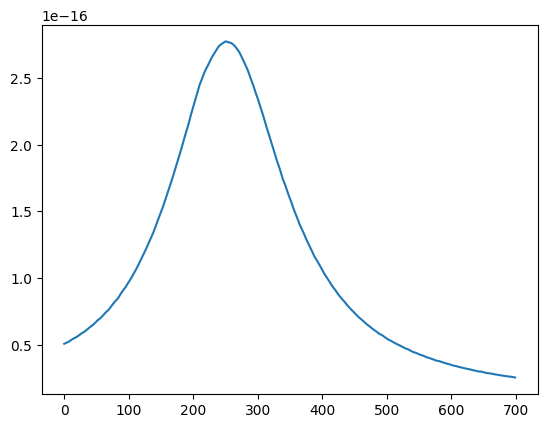

In [58]:
plt.plot(lwa_power_interp[300:1000])

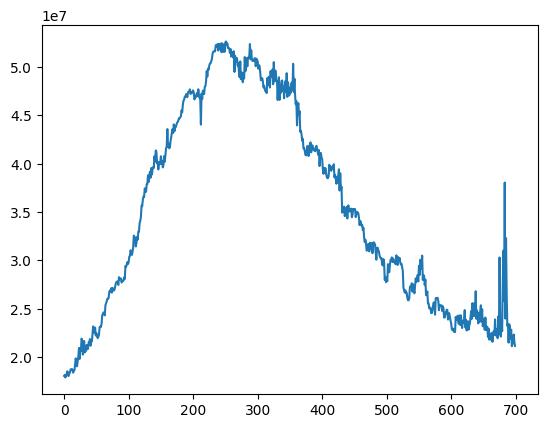

In [56]:
plt.plot(lwadat[300:1000])

In [66]:
x=lwa_power_interp[300:1000].copy()+lwa_noise_interp[300:1000].copy()
y=lwadat[300:1000].copy()
A=np.zeros((len(y),2),dtype='float64')
A[:,0]=x
A[:,1]=1
norm=np.linalg.inv(A.T@A)
m,c=np.dot(norm,A.T@y)

In [67]:
m2=A[:,0]@y/(A[:,0]@A[:,0])

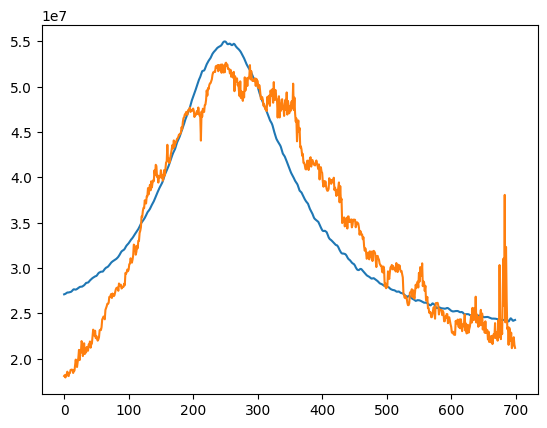

In [68]:
plt.plot(m*x+c)
plt.plot(y)

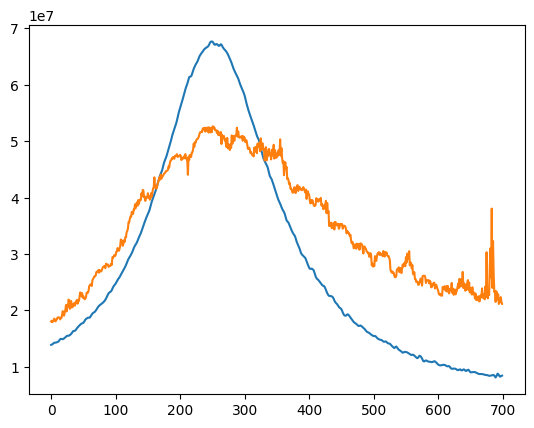

In [69]:
plt.plot(m2*x)
plt.plot(y)

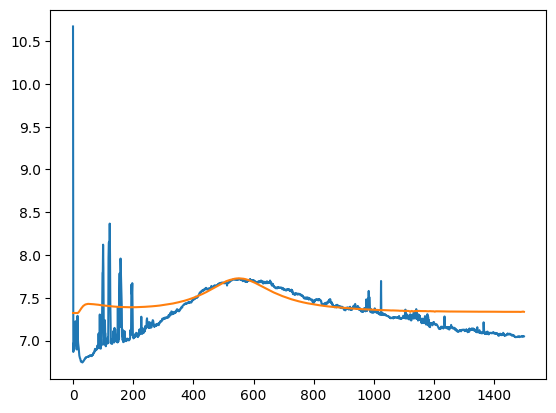

In [70]:
plt.plot(np.log10(lwadat[:1500]))
plt.plot(np.log10(m*(+lwa_power_interp[:1500]+c))

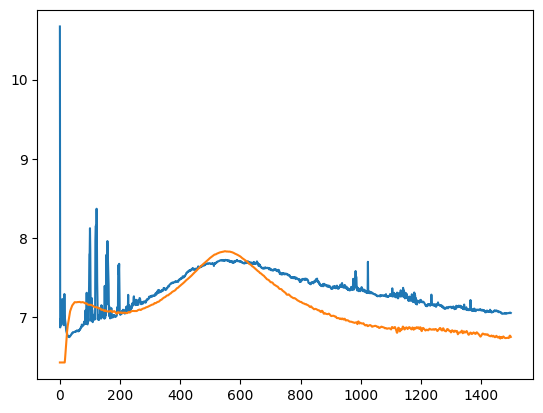

In [74]:
plt.plot(np.log10(lwadat[:1500]))
plt.plot(np.log10(m2*(lwa_noise_interp[:1500]+lwa_power_interp[:1500])))

Text(0.5, 1.0, 'MARS ALBATROS #1, 30 min around LST 20h, winter 2022-23, winter 2023-24')

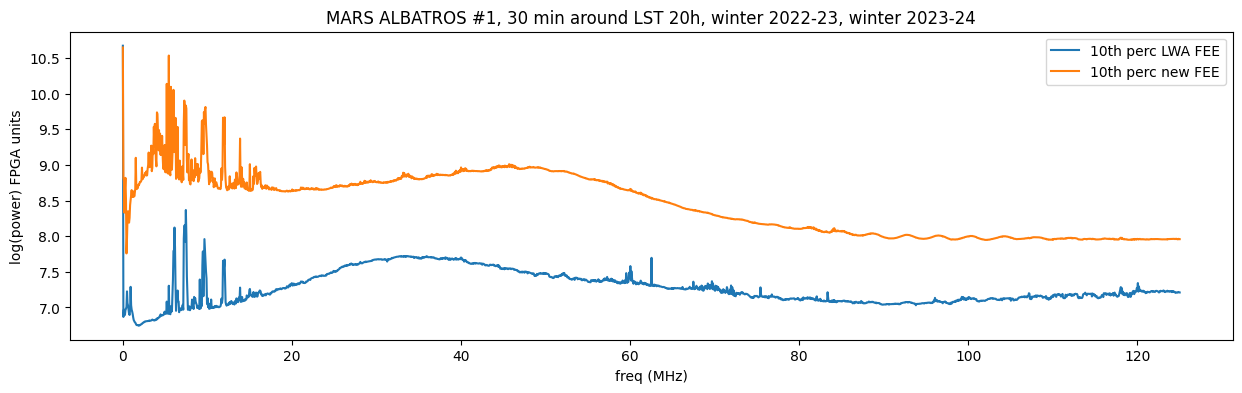

In [5]:
f=plt.gcf()
f.set_size_inches(15,4)
freqs = np.linspace(0,125,2048)
plt.plot(freqs,np.log10(np.percentile(data,5,axis=0)),label="10th perc LWA FEE")
plt.plot(freqs,np.log10(np.percentile(data2,5,axis=0)),label="10th perc new FEE")
# plt.plot(freqs,np.log10(np.mean(data,axis=0)),label="mean LWA FEE")
# plt.plot(freqs,np.log10(np.mean(data2,axis=0)),label="mean new FEE")
# plt.plot(freqs,np.log10(np.percentile(data,5,axis=0)))
plt.legend()
plt.xlabel("freq (MHz)")
plt.ylabel("log(power) FPGA units")
plt.title("MARS ALBATROS #1, 30 min around LST 20h, winter 2022-23, winter 2023-24")
# plt.xlim(0,80)